# 06.Std_Adaline_iris

매우 작은 값의 Learning Rate를 적용해야 비용함수가 특정값에 수렴하게 되어 머신러닝이 유효하게 되지만,
이는 매우 많은 수의 반복 학습이 필요하게 되어 머신러닝을 수행하는데 있어 성능상의 문제가 발생 할 수 있다.

따라서 표준화 (Standardization) 을 이용해 트레이닝 데이터를 표준화된 값으로 변환하여 머신러닝을 수행하여
비교적 큰 값의 learning rate에서도 머신러닝이 유효하게 동작 되도록 하자.

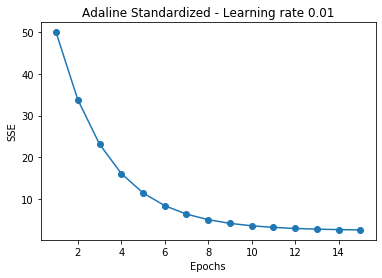

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from adaline import AdalineGD

if __name__ == '__main__':
    df = pd.read_csv('iris.data', header=None)
    y = df.iloc[0:100,4].values
    y = np.where(y=='Iris-setosa',-1,1)
    X = df.iloc[0:100,[0,2]].values
    
    # X를 한번 Copy 하여 X_std 값으로 저장함
    X_std = np.copy(X)
    
    # 이부분이 꽃받침 길이와 꽃잎 길이의 표준화에 대한 부분이다.
    X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
    X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
                     
    adal = AdalineGD(eta=0.01, n_iter=15).fit(X_std, y)
    plt.plot(range(1, len(adal.cost_)+1), adal.cost_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('SSE')
    plt.title('Adaline Standardized - Learning rate 0.01')
    plt.show()

표준 화를 진행하면 Learning Rate를 0.01로 두어도 수렴함을 알 수 있다.